In [1]:
from myenv.models.candlestick import Candlestick
from myenv.models.merchandise_rate import MerchandiseRate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('BTCUSDT')
candlestick = Candlestick(merchandise_rate_id)


bitcoin_prices = candlestick.to_df()

bitcoin_prices.describe()

bitcoin_prices['day return'] = bitcoin_prices['close'].pct_change() * 100

bitcoin_prices.tail(20)

# plt.figure(figsize=(20, 10))

# plt.plot(bitcoin_prices['day return'], label='hp')

# plt.xlabel('date')
# plt.ylabel('Day change')
# plt.title('Graph')
# plt.grid(True)

# plt.legend()
# plt.show()




,open,high,close,low,day return
date,,,,,
2021-09-07 07:00:00+07:00,52666.2,52920.0,46863.7,42843.1,-11.013617
2021-09-08 07:00:00+07:00,46868.6,47341.0,46048.3,44412.0,-1.739939
2021-09-09 07:00:00+07:00,46048.3,47400.0,46395.1,45513.1,0.753122
2021-09-10 07:00:00+07:00,46395.1,47033.0,44850.9,44132.3,-3.328369
2021-09-11 07:00:00+07:00,44842.2,45987.9,45173.7,44722.2,0.719718
2021-09-12 07:00:00+07:00,45173.7,46460.0,46025.2,44742.1,1.884946
2021-09-13 07:00:00+07:00,46025.2,46880.0,44940.7,43370.0,-2.356318
2021-09-14 07:00:00+07:00,44940.7,47250.0,47111.5,44594.4,4.830365
2021-09-15 07:00:00+07:00,47103.3,48500.0,48121.4,46682.3,2.143638


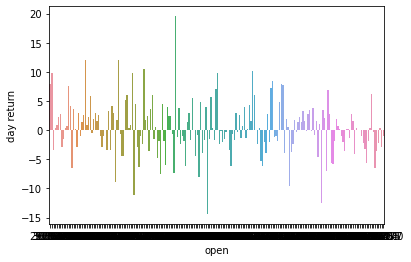

In [3]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
g = sns.barplot(data=bitcoin_prices.tail(200),
                x='open', y='day return')



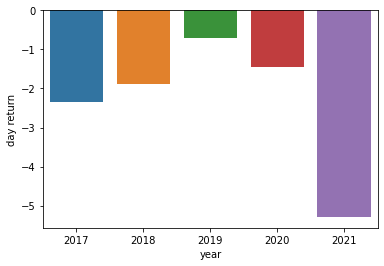

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
bitcoin_prices['day'] = bitcoin_prices[['open']].apply(
    lambda x: x.name.day, axis=1)
bitcoin_prices['month'] = bitcoin_prices[['open']].apply(
    lambda x: x.name.month, axis=1)
bitcoin_prices['year'] = bitcoin_prices[['open']].apply(
    lambda x: x.name.year, axis=1)

mid_autumn = bitcoin_prices.loc[(
    bitcoin_prices.month == 10) & (bitcoin_prices.day == 4) & (bitcoin_prices.year == 2017)]

mid_autumn = mid_autumn.append(bitcoin_prices.loc[(
    bitcoin_prices.month == 9) & (bitcoin_prices.day == 24) & (bitcoin_prices.year == 2018)])

mid_autumn = mid_autumn.append(bitcoin_prices.loc[(
    bitcoin_prices.month == 9) & (bitcoin_prices.day == 13) & (bitcoin_prices.year == 2019)])

mid_autumn = mid_autumn.append(bitcoin_prices.loc[(
    bitcoin_prices.month == 10) & (bitcoin_prices.day == 1) & (bitcoin_prices.year == 2020)])

mid_autumn = mid_autumn.append(bitcoin_prices.loc[(
    bitcoin_prices.month == 9) & (bitcoin_prices.day == 21) & (bitcoin_prices.year == 2021)])

g = sns.barplot(data=mid_autumn,
                x='year', y='day return')


In [ ]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug('LTCUSDT')
candlestick = Candlestick(merchandise_rate_id, 'day', 100, "DESC")

data_prices = candlestick.to_df()

# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['day_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
# data_prices['day'] = data_prices[['open']].apply(
#     lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
# data_prices['hour'] = data_prices[['open']].apply(
#     lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

print(f"{first_date}-{last_date}")

data_prices['type'] = candlestick_type(data_prices)

data_prices['type_continuous'] = type_continuous(data_prices)

# data_prices = data_prices[data_prices['hour'] == 10]

# number_up = len(data_prices[data_prices['type'] == 'up'])
# number_down = len(data_prices[data_prices['type'] == 'down'])

# print(number_up)
# print(number_down)

print(data_prices)

bar_width = 0.35
opacity = 0.8

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


# x = data_prices[data_prices['hour'] == 13]


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]
    # print(f"Giờ {i}")
    # print("________________________________")
    # print(data_prices_x[data_prices_x['type'] == 'up']['hour_return'].describe())
    # print("+++")
    # print(data_prices_x[data_prices_x['type'] == 'down']['hour_return'].describe())
    # data_prices[data_prices['hour'] == i]['hour_return'].plot(figsize=[20,10], legend=True, linestyle='--', marker='o')


    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()
